# Compute connected components of 3D image

This notebook uses the `skimage` library's `measure.label()` function to compute connected components in a 3D worm image.

In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from skimage import measure
from skimage import filters

from otimage import io 

### Load single video frame from file

In [4]:
# Path to HDF5 file
in_fpath = '/home/mn2822/Desktop/WormOT/data/zimmer/raw/mCherry_v00065-00115.hdf5'

# Index of frame to use
t_frame = 2

with io.ZimmerReader(in_fpath) as reader:
    frame = reader.get_frame(t_frame)

### Select head region from frame as test image 

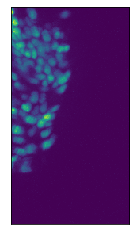

In [5]:
# Section of XY plane where head is found
head_x = (500, 650)
head_y = (250, 525)
head_z = (0, 33)

img = frame[head_x[0]:head_x[1], head_y[0]:head_y[1], head_z[0]:head_z[1]]

# Display max projection
plt.imshow(np.max(img, 2).T);
plt.xticks([])
plt.yticks([]);

### Binarize image using threshold

Right now, this threshold is set by hand.

**TODO: Find a way to automatically set this (maybe using Oatsu's algorithm?)**

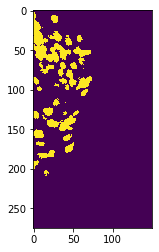

In [6]:
# Threshold applied to pixel values in image
threshold = 0.007

# Create binary th
img_th = (img >= threshold)

# Display max projection
plt.imshow(np.max(img_th, 2).T);

### Compute connected components in image

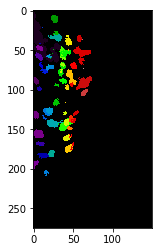

In [7]:
img_labels = measure.label(img_th)
plt.imshow(np.max(img_labels, 2).T, cmap='nipy_spectral');

### Display results

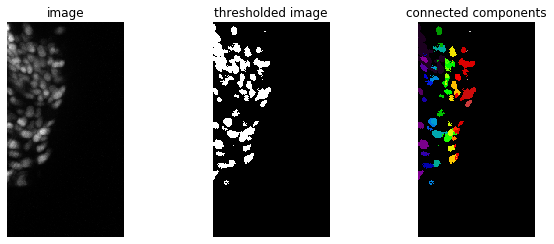

In [8]:
img_mp = np.max(img, 2)
img_th_mp = np.max(img_th, 2)
img_labels_mp = np.max(img_labels, 2)

plt.figure(figsize=(9, 3.5))

plt.subplot(131)
plt.imshow(img_mp.T, cmap='gray')
plt.axis('off')
plt.title('image')

plt.subplot(132)
plt.imshow(img_th_mp.T, cmap='gray')
plt.axis('off')
plt.title('thresholded image')

plt.subplot(133)
plt.imshow(img_labels_mp.T, cmap='nipy_spectral')
plt.axis('off')
plt.title('connected components')

plt.tight_layout()

#plt.savefig('components_mp.png')